In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.activation import sigmoid,softmax,tanh,relu
from allison.utils.metrics import accuracy
from allison.utils.functions.transforms import get_numeric_labels
from allison.utils.functions.loss import binary_cross_entropy

Dataset

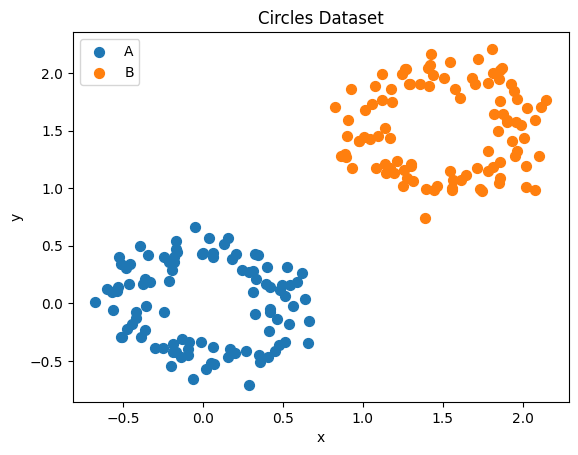

In [2]:
r1=0.5
r2=0.5
thetas = np.linspace(0,2*np.pi,100)

x1=r1*np.cos(thetas) + 0.1*np.random.randn(100)
y1=r1*np.sin(thetas) + 0.1*np.random.randn(100)

x2=1.5+r2*np.cos(thetas) + 0.1*np.random.randn(100)
y2=1.5+r2*np.sin(thetas) + 0.1*np.random.randn(100)

plt.scatter(x1,y1,s=50,label="A")
plt.scatter(x2,y2,s=50,label="B")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Dataset")
plt.legend()

In [3]:
x=x1.tolist()+x2.tolist()
y=y1.tolist()+y2.tolist()
labels = [1 for x in x1.tolist()] + [0 for x in x2.tolist()]
df=pd.DataFrame({
    "x":x,
    "y":y,
    "labels":labels
})
df.head()

,x,y,labels
0,0.414974,-0.078201,1
1,0.418143,-0.051224,1
2,0.308679,0.096939,1
3,0.415587,0.137921,1
4,0.544333,0.157001,1


# Preprocess

Split data for train and test

In [4]:
data_train, data_test = train_test_split(df,test_size=0.2)
features = ["x", "y"]
labels = "labels"

X_train = data_train[features].to_numpy()
Y_train=data_train[labels].to_numpy(int)
print(X_train.shape,Y_train.shape)

X_test = data_test[features].to_numpy()
Y_test=data_test[labels].to_numpy(int)
print(X_test.shape,Y_test.shape)

(160, 2) (160,)
(40, 2) (40,)


# Train

In [5]:
model = NeuralNetwork(binary_cross_entropy,accuracy, 0.000000005)
model.add_layer(LayerDense(2,3,sigmoid))
model.add_layer(LayerDense(3,1,sigmoid))
model.summary()

Layer:1, neurons:3, input:(n,2), weights:(2,3), output:(n,3), activation:sigmoid 

Layer:2, neurons:1, input:(n,3), weights:(3,1), output:(n,1), activation:sigmoid 

Total -> Layers:2, neurons:4, weights:9, bias:4 params:13 

Loss function: binary_cross_entropy 

Metric: accuracy 

Learning Rate: 5e-09 



In [6]:
steps = 100
iters = 10

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):
    if accuracy_train > 95.0 or accuracy_test > 95.0:
        break
    model.train(X_train,Y_train,iters,False)
    
    accuracy_train = model.evaluate(X_train,Y_train)
    accuracy_test = model.evaluate(X_test,Y_test)

    print(f"Step: {step:3d} Train Accuracy: {accuracy_train:7.3f}% Test Accuracy: {accuracy_test:7.3f}%")

Step:   1 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   2 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   3 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   4 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   5 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   6 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   7 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   8 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:   9 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  10 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  11 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  12 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  13 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  14 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  15 Train Accuracy:  51.250% Test Accuracy:  45.000%
Step:  16 Train Accuracy:  51.875% Test Accuracy:  45.000%
Step:  17 Train Accuracy:  52.500% Test Accuracy:  50.00

# Plot the predicted labels

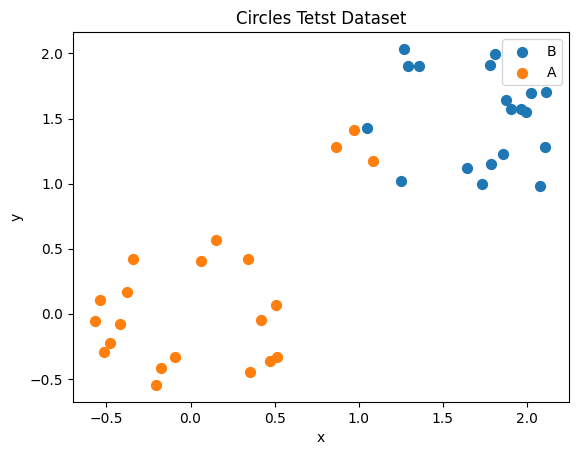

In [7]:
id2label = {0:"B",1:"A"}

data_test['prediction'] = model.predict(X_test)
data_test['pred_labels'] = data_test['prediction'].map(id2label)

for label in data_test['pred_labels'].unique():
    x = data_test[data_test['pred_labels'] == label]['x']
    y = data_test[data_test['pred_labels'] == label]['y']

    plt.scatter(x,y,s=50,label=label)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Tetst Dataset")
plt.legend()